In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pyuvdata import UVData
from ja import Timer

In [2]:
timer = Timer()

In [3]:
# We need this to just get the part of the file name with the JD in it
def zenstem(filelist):
    stemlist = []
    for f in filelist:
        tmp = (os.path.basename(f)).split('.')
        stemlist.append(tmp[0]+'.'+tmp[1]+'.'+tmp[2])
    stemlist.sort()
    return stemlist

In [4]:
JD = '2458099'
radDay = 2*np.pi
interval = 2./(24*60.)*2*np.pi # 2 minutes
path = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'+JD+'/'
imaged_path = '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/'+JD+'/'
outpath = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'+JD+'_sliced/'

In [5]:
# Import all of Adam's functions
import lst_slicer

In [6]:
timer.start()
sliced, master_dict = lst_slicer.slice_day (path, JD, interval)
timer.stop('Making master dictionary')

Making master dictionary 33.80302453041077 sec


In [7]:
lsts = []
jds = []
filenames = []
for key in list(master_dict.keys()):
    jds.append(key[0])
    lsts.append(key[1])
    filenames.append(master_dict[key])
srt = np.argsort(jds)
lsts = np.array(lsts)[srt]
jds = np.array(jds)[srt]
filenames = np.array(filenames)[srt]

In [8]:
filenames

array(['/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.25974.HH.calibrated.uvh5',
       '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.25974.HH.calibrated.uvh5',
       '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.25974.HH.calibrated.uvh5',
       ...,
       '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.64002.HH.calibrated.uvh5',
       '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.64002.HH.calibrated.uvh5',
       '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.64002.HH.calibrated.uvh5'],
      dtype='<U96')

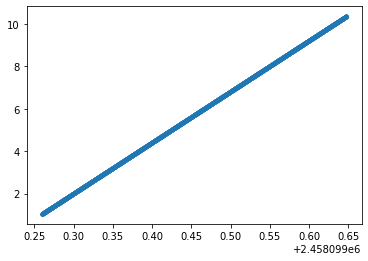

In [9]:
plt.plot(jds,lsts*24/(2.*np.pi),'.')

In [10]:
from astropy.coordinates import Angle
from astropy import units as u

In [11]:
def lststr(angle):
    h, m, s = Angle(angle).hms
    #print(h, m, s)
    return str('%02.0f' % h) + str('%02.0f' % m) + str('%02.0f' % s) 

In [12]:
interval = 247.5645/(24*3600.)*2*np.pi # A magic number
nsamps = []
lst_grid = []
for i in np.arange(0, radDay, interval):
    wh = np.logical_and(lsts >= i, lsts < i+interval)
    nsamp = wh.sum()
    if nsamp > 0:
        if nsamp >= 23: # Another magic number
            necessary_files = np.unique(filenames[wh])
            #print(i*24/(2.*np.pi), nsamp, necessary_files)
            nsamps.append(nsamp)
            lst_grid.append(i)
            timer.start()
            uvd = UVData()
            timer.stop('Create object')
            timer.start()
            uvd.read(list(necessary_files))
            timer.stop('Reading files')
            timer.start()
            uvd.select(times=jds[wh])
            timer.stop('Selecting')
            outfile = 'zen.'+lststr(i*u.rad)+'_'+lststr((i+interval)*u.rad)+'.calibrated.HH.uvfits'
            print(outfile)
            timer.start()
            uvd.write_uvfits(outpath+outfile, spoof_nonessential=True,force_phase=True)
            timer.stop('Writing')
nsamps = np.array(nsamps)
lst_grid = np.array(lst_grid)*24./(2.*np.pi)

Create object 0.0006480216979980469 sec
Reading files 39.139217376708984 sec
Selecting 2.3910882472991943 sec
zen.010601_011009.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 17.334771633148193 sec
Create object 0.18107151985168457 sec
Reading files 98.98387789726257 sec
Selecting 2.995828628540039 sec
zen.011009_011416.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 15.634474039077759 sec
Create object 0.01199793815612793 sec
Reading files 15.101807832717896 sec
Selecting 2.619201421737671 sec
zen.011416_011824.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 13.147048711776733 sec
Create object 0.0078046321868896484 sec
Reading files 15.111596822738647 sec
Selecting 2.5807723999023438 sec
zen.011824_012231.calibrated.H

Writing 13.234095335006714 sec
Create object 0.19680094718933105 sec
Reading files 99.58782148361206 sec
Selecting 3.2612130641937256 sec
zen.030948_031356.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 13.6050443649292 sec
Create object 0.009098529815673828 sec
Reading files 17.075504064559937 sec
Selecting 2.362760066986084 sec
zen.031356_031803.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 12.147011756896973 sec
Create object 0.19863653182983398 sec
Reading files 16.814249515533447 sec
Selecting 2.4429004192352295 sec
zen.031803_032211.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 12.225244522094727 sec
Create object 0.20455598831176758 sec
Reading files 100.28827142715454 sec
Selecting 5.728498220443726 sec
zen.

Writing 83.84474873542786 sec
Create object 0.21125078201293945 sec
Reading files 104.44399070739746 sec
Selecting 3.681626796722412 sec
zen.050927_051335.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 18.22423005104065 sec
Create object 0.009308815002441406 sec
Reading files 17.06606388092041 sec
Selecting 2.755164623260498 sec
zen.051335_051742.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 12.556949853897095 sec
Create object 0.2006983757019043 sec
Reading files 103.25076985359192 sec
Selecting 3.6528849601745605 sec
zen.051742_052150.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 18.04327630996704 sec
Create object 0.028630495071411133 sec
Reading files 16.559776067733765 sec
Selecting 2.3603615760803223 sec
zen.0

Writing 13.728779077529907 sec
Create object 0.009492874145507812 sec
Reading files 16.75292730331421 sec
Selecting 2.5445308685302734 sec
zen.070907_071314.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 12.826035022735596 sec
Create object 0.19717764854431152 sec
Reading files 16.3668429851532 sec
Selecting 2.5364432334899902 sec
zen.071314_071722.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 12.805645227432251 sec
Create object 0.19539713859558105 sec
Reading files 124.24757790565491 sec
Selecting 3.693938970565796 sec
zen.071722_072129.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 14.081101655960083 sec
Create object 0.009626150131225586 sec
Reading files 16.390368938446045 sec
Selecting 2.5409955978393555 sec
ze

Writing 14.79931902885437 sec
Create object 0.009993553161621094 sec
Reading files 16.404813289642334 sec
Selecting 2.6720776557922363 sec
zen.090846_091254.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 14.967488765716553 sec
Create object 0.23408007621765137 sec
Reading files 18.082762241363525 sec
Selecting 3.0445680618286133 sec
zen.091254_091701.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 14.123612403869629 sec
Create object 0.28987789154052734 sec
Reading files 165.59132075309753 sec
Selecting 4.790521860122681 sec
zen.091701_092109.calibrated.HH.uvfits
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
Writing 16.06004023551941 sec
Create object 0.13042688369750977 sec
Reading files 16.85069513320923 sec
Selecting 2.729046583175659 sec
zen.

In [13]:
list(necessary_files)

['/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099/zen.2458099.64002.HH.calibrated.uvh5']

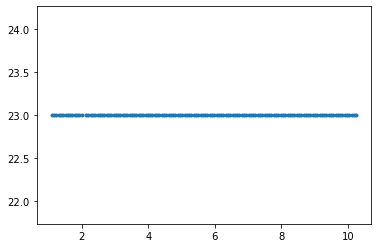

In [14]:
plt.plot(lst_grid,nsamps,'.')